# How does it work?
The Naive Bayes classifier aggregates information using conditional probability with an assumption of independence among features. What does it mean? For example, it means we have to assume that the comfort of the room on the Titanic is independent of the fare ticket. This assumption is absolutely wrong and it is why it is called Naive. It allows to simplify the calculation, even on very large datasets.

The Naive Bayes classifier is based on finding functions describing the probability of belonging to a class given features. We write it P(Survival | f1,…, fn). We apply the Bayes law to simplify the calculation:
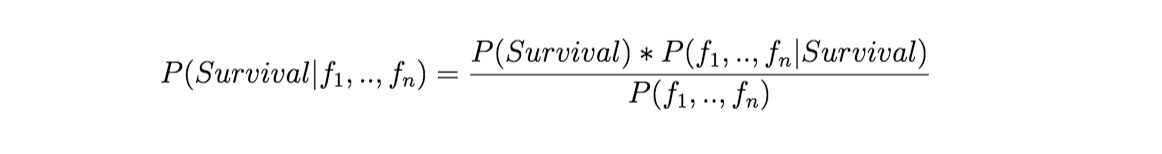

P(Survival) is easy to compute and we do not need P( f1,…, fn) to build a classifier. It remains P(f1,…, fn | Survival) calculation. If we apply the conditional probability formula to simplify calculation again:
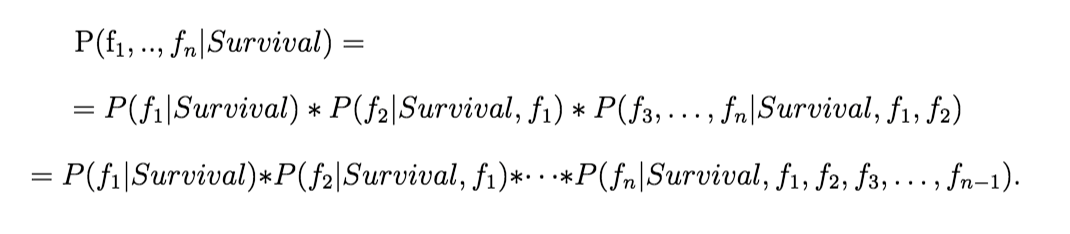

Each calculation of terms of the last line above requires a dataset where all conditions are available. To calculate the probability of obtaining f_n given the Survival, f_1, …, f_n-1 information, we need to have enough data with different values of f_n where condition {Survival, f_1, …, f_n-1} is verified. It requires a lot of data. We face the curse of dimensionality. Here is where the Naive Assumption will help. As feature are assumed independent, we can simplify calculation by considering that the condition {Survival, f_1, …, f_n-1} is equal to {Survival}:

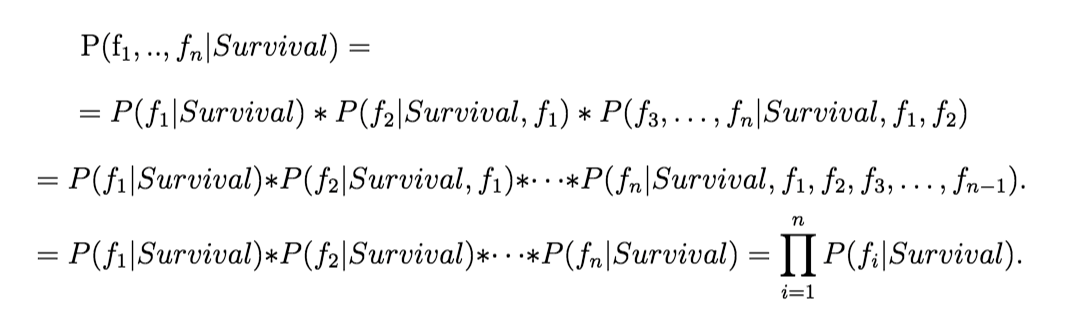

Finally to classify a new vector of features, we just have to choose the Survival value (1 or 0) for which P(f_1, …, f_n|Survival) is the highest:

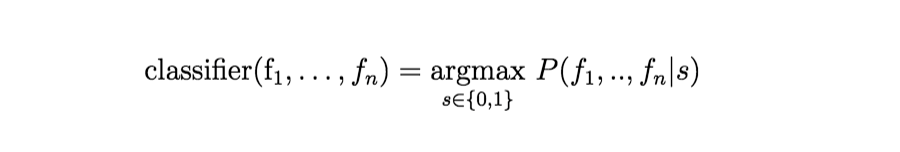

NB: One common mistake is to consider the probability outputs of the classifier as true. In fact, Naive Bayes is known as a bad estimator, so do not take those probability outputs too seriously.



# Find the correct distribution function
One last step remains to begin to implement a classifier. How to model the probability functions P(f_i| Survival)? There are three available models in the Sklearn python library:

Gaussian: It assumes that continuous features follow a normal distribution.
Multinomial: It is useful if your features are discrete.
Bernoulli: The binomial model is useful if your features are binary.

### Python Code
Here we implement a classic Gaussian Naive Bayes on the Titanic Disaster dataset. We will use Class of the room, Sex, Age, number of siblings/spouses, number of parents/children, passenger fare and port of embarkation information.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB



In [4]:
# Importing dataset
data = pd.read_csv("train.csv")

In [5]:
# Convert categorical variable to numeric
data["Sex_cleaned"]=np.where(data["Sex"]=="male",0,1)
data["Embarked_cleaned"]=np.where(data["Embarked"]=="S",0,
                                  np.where(data["Embarked"]=="C",1,
                                           np.where(data["Embarked"]=="Q",2,3)
                                          )
                                 )

In [6]:
# Cleaning dataset of NaN
data=data[[
    "Survived",
    "Pclass",
    "Sex_cleaned",
    "Age",
    "SibSp",
    "Parch",
    "Fare",
    "Embarked_cleaned"
]].dropna(axis=0, how='any')

# Split dataset in training and test datasets
X_train, X_test = train_test_split(data, test_size=0.5, random_state=int(time.time()))

In [7]:
# Instantiate the classifier
gnb = GaussianNB()
used_features =[
    "Pclass",
    "Sex_cleaned",
    "Age",
    "SibSp",
    "Parch",
    "Fare",
    "Embarked_cleaned"
]

In [8]:
# Train classifier
gnb.fit(
    X_train[used_features].values,
    X_train["Survived"]
)
y_pred = gnb.predict(X_test[used_features])

# Print results
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"
      .format(
          X_test.shape[0],
          (X_test["Survived"] != y_pred).sum(),
          100*(1-(X_test["Survived"] != y_pred).sum()/X_test.shape[0])
))

Number of mislabeled points out of a total 357 points : 88, performance 75.35%


In [9]:
mean_survival=np.mean(X_train["Survived"])
mean_not_survival=1-mean_survival
print("Survival prob = {:03.2f}%, Not survival prob = {:03.2f}%"
      .format(100*mean_survival,100*mean_not_survival))

mean_fare_survived = np.mean(X_train[X_train["Survived"]==1]["Fare"])
std_fare_survived = np.std(X_train[X_train["Survived"]==1]["Fare"])
mean_fare_not_survived = np.mean(X_train[X_train["Survived"]==0]["Fare"])
std_fare_not_survived = np.std(X_train[X_train["Survived"]==0]["Fare"])

print("mean_fare_survived = {:03.2f}".format(mean_fare_survived))
print("std_fare_survived = {:03.2f}".format(std_fare_survived))
print("mean_fare_not_survived = {:03.2f}".format(mean_fare_not_survived))
print("std_fare_not_survived = {:03.2f}".format(std_fare_not_survived))


Survival prob = 39.22%, Not survival prob = 60.78%
mean_fare_survived = 59.63
std_fare_survived = 85.58
mean_fare_not_survived = 20.45
std_fare_not_survived = 24.24


### If we train the Sklearn Gaussian Naive Bayes classifier on the same dataset. 

In [10]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
used_features =["Fare"]
y_pred = gnb.fit(X_train[used_features].values, X_train["Survived"]).predict(X_test[used_features])
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"
      .format(
          X_test.shape[0],
          (X_test["Survived"] != y_pred).sum(),
          100*(1-(X_test["Survived"] != y_pred).sum()/X_test.shape[0])
))
print("Std Fare not_survived {:05.2f}".format(np.sqrt(gnb.sigma_)[0][0]))
print("Std Fare survived: {:05.2f}".format(np.sqrt(gnb.sigma_)[1][0]))
print("Mean Fare not_survived {:05.2f}".format(gnb.theta_[0][0]))
print("Mean Fare survived: {:05.2f}".format(gnb.theta_[1][0]))


Number of mislabeled points out of a total 357 points : 132, performance 63.03%
Std Fare not_survived 24.24
Std Fare survived: 85.58
Mean Fare not_survived 20.45
Mean Fare survived: 59.63


credits:https://blog.sicara.com/naive-bayes-classifier-sklearn-python-example-tips-42d100429e44

i have glanced through these websites to understand more:
https://medium.com/machine-learning-101/chapter-1-supervised-learning-and-naive-bayes-classification-part-2-coding-5966f25f1475
https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/